# <font color=steelblue>DS-03 Data Science und künstliche Intelligenz</font>

## <font color=grey>Beispiele zu Machine Learning Algorithmen</font>

In den Beispielen verwenden wir großteils die Daten aus unserem Fallbeispiel der Kundenabwanderung in einem Telekommunikationsunternehmen. Für die einzelnen Modelle betrachten jedoch immer nur 2 Dimensionen (Features), damit wir die Ergebnisse visualisieren können.

Als weitere Datensätze werden der Iris-Datensatz von Fisher aus dem Jahr 1936 und der MINST-Datensatz (handschriftliche Ziffern) verwendet.

Laden der notwendigen Basis Bibliotheken:

In [1]:
flagShowFigures = False

In [2]:
#In der online Variante müssen die folgenden Bibliotheken virtuell nachinstalliert werden
#import piplite
#await piplite.install('seaborn')
#await piplite.install('graphviz')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, mean_squared_error, r2_score

Definition einer Hilfsfunktion, um die Confusion Matrix komfortabel darzustellen:

In [4]:
def showConfusionMatrix(y_test, y_pred):
    plt.figure(figsize = (4,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                annot = True, fmt = "d", linecolor = "k", linewidths = 0, cmap="YlGnBu")
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.title("CONFUSION MATRIX",fontsize=14)
    plt.show() 


Laden der Daten des Fallbeispiel der Kundenabwanderung im Telekommunikationsunternehmen (CleanedData4ML.csv)

In [5]:
df = pd.read_csv('CleanedData4ML.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CalculatedTotalCharges,Churn
0,0,5365,0,0,1,0,-1.280248,0,1,0,...,0,0,0,0,1,2,-1.161694,-0.994194,-0.995034,0
1,1,3953,1,0,0,0,0.064303,1,0,0,...,0,0,0,1,0,3,-0.260878,-0.173740,-0.153164,0
2,2,2558,1,0,0,0,-1.239504,1,0,0,...,0,0,0,0,1,3,-0.363923,-0.959649,-0.960656,1
3,3,5524,1,0,0,0,0.512486,0,1,0,...,2,0,0,1,0,0,-0.747850,-0.195248,-0.167649,0
4,4,6500,0,0,0,0,-1.239504,1,0,1,...,0,0,0,0,1,2,0.196178,-0.940457,-0.945775,1


### <font color=grey>Trainings- und Testdaten aufteilen</font>

Als erstes werden wir die ersten beiden Spalten los:

In [6]:
df = df.drop(columns = ['Unnamed: 0', 'customerID'])

Dann trennen wir die Features von der Ergebnisgröße "Churn"

In [7]:
x = df.drop(columns = ['Churn'])
y = df['Churn'].values

Jetzt erfolgt die Aufteilung ind Trainings- und Testdaten

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 40, stratify=y)

In [9]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CalculatedTotalCharges
980,1,0,0,0,-1.280248,1,2,1,0,0,0,0,0,2,0,1,2,0.724701,-0.969157,-0.969974
6556,1,0,1,0,1.164390,1,2,1,2,2,0,0,2,2,0,1,2,1.376214,1.805295,1.852495
2207,1,0,0,0,-0.913552,1,0,2,1,1,1,1,1,1,1,0,3,-1.505733,-0.907721,-0.922106
2521,1,0,0,0,-1.280248,1,0,2,1,1,1,1,1,1,0,0,3,-1.509057,-0.998804,-0.999649
2746,0,0,1,1,-0.546857,0,1,0,0,0,0,0,0,0,0,1,3,-1.327896,-0.815535,-0.799719


---
### <font color=steelblue>k-Nearest Neighbours</font>


In [10]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1549
           1       0.63      0.40      0.49       561

    accuracy                           0.78      2110
   macro avg       0.72      0.66      0.67      2110
weighted avg       0.76      0.78      0.76      2110



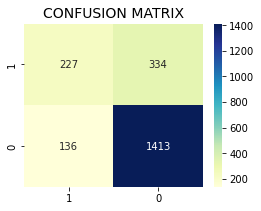

array([[1413,  136],
       [ 334,  227]], dtype=int64)

In [11]:
features = ['tenure', 'MonthlyCharges']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

knn_model = KNeighborsClassifier(n_neighbors = 10) 

knn_model.fit(x2_train,y_train)

predicted_y = knn_model.predict(x2_test)

print(classification_report(y_test, predicted_y))

showConfusionMatrix(y_test, predicted_y)

confusion_matrix(y_test, predicted_y)

In [12]:
y_test[1:100]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [13]:
predicted_y[1:100]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [14]:
#Darstellung
if flagShowFigures: 
    plt.rcParams["figure.figsize"] = (12,12)

    cmap = plt.cm.coolwarm
    ax = plt.subplot()

    DecisionBoundaryDisplay.from_estimator(
        knn_model, 
        x2_test,
        cmap = cmap, 
        alpha=0.8, 
        ax=ax, 
        eps=0.5,
        xlabel=features[0],
        ylabel=features[1],
    )

    ax.scatter(x2_test[features[0]] , x2_test[features[1]] , c=y_test, edgecolors="k", cmap = cmap, alpha=0.7)

---
### <font color=steelblue>K-Means</font>


In [15]:
from sklearn.cluster import KMeans

In [16]:
#Features auswählen
features = ['tenure', 'MonthlyCharges']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

#Training
kmeans = KMeans(init="random", n_clusters=5, n_init=4, random_state=0).fit(x2_train)

#Abruf
clusterTrain = kmeans.predict(x2_train)

#Darstellung
if flagShowFigures: 
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (12, 12)

    DecisionBoundaryDisplay.from_estimator(
        kmeans, 
        x2_train,
        cmap = cmap, 
        alpha=0.8, 
        ax=ax, 
        eps=0.5,
        xlabel=features[0],
        ylabel=features[1],
    )

    ax.scatter(x2_train[features[0]], x2_train[features[1]], c=clusterTrain, edgecolors="k", cmap = cmap, alpha=1)

    plt.show()

#### Beispiel unter Verwendung des Iris data Set

In [17]:
# Laden des Datensets
from sklearn import datasets
iris = datasets.load_iris()

In [18]:
# Erste beiden Features
# Sepal length
# Sepal width
dimensions = [0,1]
X = iris.data[:, dimensions]
Y = iris.target

#Trainieren
kmeans = KMeans(init="random", n_clusters=3, n_init=4, random_state=0).fit(X)

#Abruf
clusterTrain = kmeans.predict(X)

#Darstellung
if flagShowFigures: 
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (12, 12)

    DecisionBoundaryDisplay.from_estimator(
        kmeans, 
        X,
        cmap = plt.cm.coolwarm, 
        alpha=0.8, 
        ax=ax, 
        eps=0.5,
        xlabel=iris.feature_names[dimensions[0]],
        ylabel=iris.feature_names[dimensions[1]],
    )

    ax.scatter(X[:, 0], X[:, 1], c = Y, edgecolors="k", cmap = plt.cm.coolwarm, alpha=1)

    plt.show()


---
### <font color=steelblue>DBSCAN</font>


In [19]:
from sklearn.cluster import DBSCAN

In [20]:
#Features auswählen
features = ['tenure', 'MonthlyCharges']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

#Training
db = DBSCAN(eps=0.1, min_samples=10).fit(x2_train)
clusters = db.fit_predict(x2_train)

#Auswertung
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_train, labels)
)

#Darstellung
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

if flagShowFigures: 
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (12, 12)

    ax.scatter(x2_train[features[0]], x2_train[features[1]], c=clusters, edgecolors="k", cmap = cmap, alpha=1)

    plt.show()



Estimated number of clusters: 5
Estimated number of noise points: 228
Homogeneity: 0.040
Completeness: 0.031
V-measure: 0.035
Adjusted Rand Index: -0.051
Adjusted Mutual Information: 0.034


---
### <font color=steelblue>Lineare Regression</font>


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#Features auswählen
features = ['CalculatedTotalCharges', 'TotalCharges']

#Wir nehmen die 2. Dimension als Ergebnisgröße
x2_train = pd.DataFrame({features[0] : x_train[features[0]]})
yLin_train = pd.DataFrame({features[1] : x_train[features[1]]})

x2_test = pd.DataFrame({features[0] : x_test[features[0]]})
yLin_test = pd.DataFrame({features[1] : x_test[features[1]]})

#Modelltraining
regModel = LinearRegression()
regModel.fit(x2_train, yLin_train)

#Abruf mit Testdaten
predicted_y = regModel.predict(x2_test)

#Auswertung
print("Coefficients: \n", regModel.coef_)
print("MSE: %.2f" % mean_squared_error(y_test, predicted_y))
print("R-Squared: %.2f" % r2_score(y_test, predicted_y))

#Darstellung
if flagShowFigures: 
    fig, ax = plt.subplots(1,2)
    plt.rcParams["figure.figsize"] = (24, 12)

    ax[0].scatter(x2_train[features[0]], yLin_train[features[1]], edgecolors="k", cmap = cmap, alpha=1)
    ax[0].set_title('Training')

    ax[1].scatter(x2_test[features[0]], predicted_y, edgecolors="k", cmap = cmap, alpha=1)
    ax[1].set_title('Test')

    plt.show()


Coefficients: 
 [[0.99989113]]
MSE: 1.46
R-Squared: -6.47


---
### <font color=steelblue>Logistische Regression</font>


In [23]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1549
           1       0.45      0.02      0.05       561

    accuracy                           0.73      2110
   macro avg       0.59      0.51      0.45      2110
weighted avg       0.66      0.73      0.63      2110



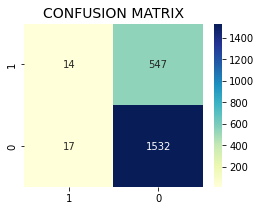

In [24]:
#Features auswählen
features = ['SeniorCitizen', 'PaymentMethod']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

#Training
lrModel = LogisticRegression()
lrModel.fit(x2_train, y_train)

#Abruf mit Testdaten
predicted_y = lrModel.predict(x2_test)

#Auswertung
print(classification_report(y_test, predicted_y))

showConfusionMatrix(y_test, predicted_y)

#Darstellung
if flagShowFigures: 
    plt.rcParams["figure.figsize"] = (12,12)

    cmap = plt.cm.coolwarm
    ax = plt.subplot()

    DecisionBoundaryDisplay.from_estimator(
        lrModel, 
        x2_test,
        cmap = cmap, 
        alpha=0.8, 
        ax=ax, 
        eps=0.5,
        xlabel=features[0],
        ylabel=features[1],
    )

    ax.scatter(x2_test[features[0]] , x2_test[features[1]] , c=y_test, edgecolors="k", s = 200, cmap = cmap, alpha=0.01)

---
### <font color=steelblue>Decision Trees</font>


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1549
           1       0.56      0.18      0.27       561

    accuracy                           0.74      2110
   macro avg       0.66      0.56      0.56      2110
weighted avg       0.71      0.74      0.69      2110



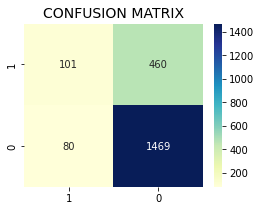

Tiefe:  3
Anzahl Leafs:  8


In [26]:
#Features auswählen
features = ['SeniorCitizen', 'PaymentMethod']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

#Training
dtModel = DecisionTreeClassifier(
    criterion='entropy',
)
dtModel.fit(x2_train,y_train)

#Abruf mit Testdaten
predicted_y = dtModel.predict(x2_test)

#Auswertung
print(classification_report(y_test, predicted_y))

showConfusionMatrix(y_test, predicted_y)
 
print("Tiefe: ", dtModel.get_depth())
print("Anzahl Leafs: ", dtModel.get_n_leaves())


In [27]:
#Tree darstellen
if flagShowFigures: 
    dot_data = tree.export_graphviz(dtModel, out_file=None, 
                                    feature_names = features,  
                                    class_names = ['no Churn','Churn'],
                                    filled = True)
    graph = graphviz.Source(dot_data, format="png") 
    graph

---
### <font color=steelblue>Random Forest</font>


In [28]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1549
           1       0.56      0.18      0.27       561

    accuracy                           0.74      2110
   macro avg       0.66      0.56      0.56      2110
weighted avg       0.71      0.74      0.69      2110



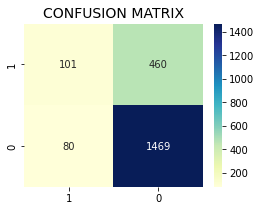

In [29]:
#Features auswählen
features = ['SeniorCitizen', 'PaymentMethod']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

#Training
rfModel = RandomForestClassifier(
    n_estimators = 100, 
    criterion='entropy'
)
rfModel.fit(x2_train,y_train)

#Abruf mit Testdaten
predicted_y = rfModel.predict(x2_test)

#Auswertung
print(classification_report(y_test, predicted_y))

showConfusionMatrix(y_test, predicted_y)


---
### <font color=steelblue>Naive Bayes</font>


In [30]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1549
           1       0.47      0.23      0.31       561

    accuracy                           0.73      2110
   macro avg       0.62      0.57      0.57      2110
weighted avg       0.69      0.73      0.69      2110



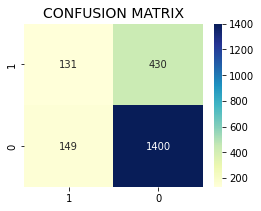

In [31]:
#Features auswählen
features = ['SeniorCitizen', 'PaymentMethod']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

#Training
nbModel = GaussianNB()
nbModel.fit(x2_train,y_train)

#Abrufen mit Testdaten
predicted_y = nbModel.predict(x2_test)

#Auswertung
print(classification_report(y_test, predicted_y))

showConfusionMatrix(y_test, predicted_y)

#Darstellung
if flagShowFigures: 
    plt.rcParams["figure.figsize"] = (12,12)

    cmap = plt.cm.coolwarm
    ax = plt.subplot()

    DecisionBoundaryDisplay.from_estimator(
        nbModel, 
        x2_test,
        cmap = cmap, 
        alpha=0.8, 
        ax=ax, 
        eps=0.5,
        xlabel=features[0],
        ylabel=features[1],
    )

    ax.scatter(x2_test[features[0]] , x2_test[features[1]] , c=y_test, edgecolors="k", s = 200, cmap = cmap, alpha=0.01)

---
### <font color=steelblue>Support Vector Machines</font>


In [32]:
from sklearn.svm import SVC
from sklearn import svm

              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1549
           1       0.45      0.02      0.05       561

    accuracy                           0.73      2110
   macro avg       0.59      0.51      0.45      2110
weighted avg       0.66      0.73      0.63      2110



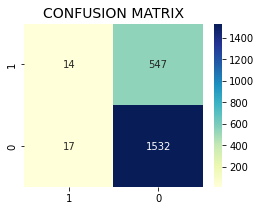

In [33]:
#Features auswählen
features = ['SeniorCitizen', 'PaymentMethod']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

#Training
C = 1.0 # SVM regularization parameter
svmModel = SVC(
    #kernel="linear",
    #kernel="rbf", gamma=0.7,  
    kernel="poly", degree=3, gamma="auto",
    C=C
)

svmModel.fit(x2_train,y_train)

#Abruf mit Testdateb
predicted_y = svmModel.predict(x2_test)

#Auswertung
print(classification_report(y_test, predicted_y))

showConfusionMatrix(y_test, predicted_y)

#Darstellung
if flagShowFigures: 
    plt.rcParams["figure.figsize"] = (12,12)

    cmap = plt.cm.coolwarm
    ax = plt.subplot()

    DecisionBoundaryDisplay.from_estimator(
        svmModel, 
        x2_test,
        cmap = cmap, 
        alpha=0.8, 
        ax=ax, 
        eps=0.5,
        xlabel=features[0],
        ylabel=features[1],
    )

    ax.scatter(x2_test[features[0]] , x2_test[features[1]] , c=y_test, edgecolors="k", s = 200, cmap = cmap, alpha=0.01)

#### SVM Beispiel Iris Data Set

Beispieldaten: Unterscheidung von Schwertlilien (im Englischen Iris): Fisher's Iris data set 


In [34]:
from sklearn import datasets

# Laden des Datensets
iris = datasets.load_iris()

In [35]:

# Erste beiden Features
# Sepal length
# Sepal width
X = iris.data[:, :2]
Y = iris.target

#SVM initalialisieren
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
#Training
models = (clf.fit(X, Y) for clf in models)

#Titel für die Plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)


#2x2 Grid für dei Plots
if flagShowFigures: 
    plt.rcParams["figure.figsize"] = (14, 14)
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]

    for clf, title, ax in zip(models, titles, sub.flatten()):
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel=iris.feature_names[0],
            ylabel=iris.feature_names[1],
        )
        ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


In [36]:
#Auswertung
for clf, title in zip(models, titles):
    predicted_Y = clf.predict(X)
    print(title) 
    print(classification_report(Y, predicted_Y))    
    #showConfusionMatrix(Y, predicted_Y)

SVC with linear kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.76      0.74        50
           2       0.74      0.70      0.72        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

LinearSVC (linear kernel)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.75      0.60      0.67        50
           2       0.69      0.82      0.75        50

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150

SVC with RBF kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.74      0.74        50
      

---
### <font color=steelblue>Neuronale Netzwerke</font>


#### Fallbeispiel der Kundenabwanderung in einem Telekommunikationsunternehmen

In [37]:
from sklearn.neural_network import MLPClassifier

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1549
           1       0.56      0.18      0.27       561

    accuracy                           0.74      2110
   macro avg       0.66      0.56      0.56      2110
weighted avg       0.71      0.74      0.69      2110



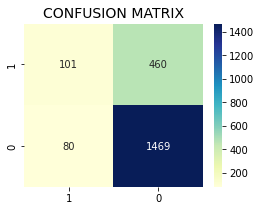

In [38]:
#Features auswählen
features = ['SeniorCitizen', 'PaymentMethod']

x2_train = pd.DataFrame({features[0] : x_train[features[0]], features[1] : x_train[features[1]]})
x2_test = pd.DataFrame({features[0] : x_test[features[0]], features[1] : x_test[features[1]]})

#Training
C = 1.0 # SVM regularization parameter
nnModel = MLPClassifier(
    hidden_layer_sizes = [20, 20],
    activation = 'relu',
    solver= 'adam', #sgd #stochastic gradient descent
    random_state = 100
)

nnModel.fit(x2_train,y_train)

#Abruf mit Testdateb
predicted_y = nnModel.predict(x2_test)

#Auswertung
print(classification_report(y_test, predicted_y))

showConfusionMatrix(y_test, predicted_y)

if flagShowFigures: 
    plt.rcParams["figure.figsize"] = (12,6)
    fig, ax = plt.subplots()
    cmap = plt.cm.coolwarm
    ax = plt.subplot()
    ax.plot(nnModel.loss_curve_, linewidth=2.0)
    plt.show()

    #Darstellung
    plt.rcParams["figure.figsize"] = (12,12)
    fig, ax = plt.subplots()

    cmap = plt.cm.coolwarm
    ax = plt.subplot()

    DecisionBoundaryDisplay.from_estimator(
        nnModel, 
        x2_test,
        cmap = cmap, 
        alpha=0.8, 
        ax=ax, 
        eps=0.5,
        xlabel=features[0],
        ylabel=features[1],
    )

    ax.scatter(x2_test[features[0]] , x2_test[features[1]] , c=y_test, edgecolors="k", s = 200, cmap = cmap, alpha=0.01)
    plt.show()

#### Fallbeispiel Handschrifterkennung (MINST-Datensatz)

In [39]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

#Daten laden
digits = datasets.load_digits()

digits.images.shape

(1797, 8, 8)

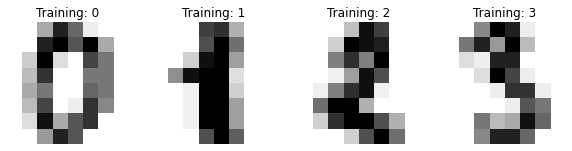

In [40]:
#Erste 4 Ziffern zeichnen
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % int(label))
    
# Daten in Trainings- und testdaten aufspalten
# flatten the images
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

X1_train, X1_test, y1_train, y1_test = train_test_split(data, digits.target, test_size=0.3, shuffle=False)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(16,), max_iter=1000, random_state=100):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.88      0.87      0.88        53
           2       0.93      0.98      0.95        53
           3       0.89      0.79      0.84        53
           4       0.89      0.89      0.89        57
           5       0.95      0.95      0.95        56
           6       0.90      0.98      0.94        54
           7       0.89      0.89      0.89        54
           8       0.87      0.92      0.90        52
           9       0.96      0.93      0.94        55

    accuracy                           0.91       540
   macro avg       0.92      0.91      0.91       540
weighted avg       0.92      0.91      0.91       540




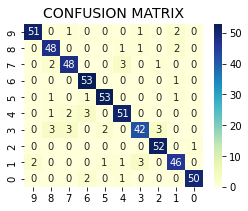

In [41]:
# Neuronales Netzwerk initialisieren
mlp = MLPClassifier(
    hidden_layer_sizes=(16,),
    max_iter=1000,
    alpha=1e-4,
    activation = 'relu',
    solver= 'adam', #sgd #stochastic gradient descent
    random_state=100,
    #learning_rate_init=0.2,
)
#Training
mlp.fit(X1_train, y1_train)

#Abruf mit Testdaten
predicted = mlp.predict(X1_test)

#Auswertung
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y1_test, predicted)}\n"
)

showConfusionMatrix(y1_test, predicted)


Schauen wir uns die Testdaten an:

Die ersten 4 Testdatensätze:



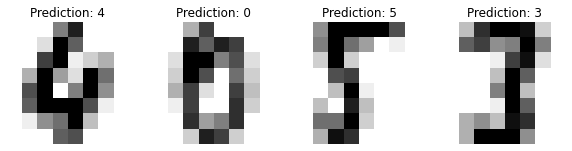

In [42]:
#Die ersten 4 Testdatensätze
print("Die ersten 4 Testdatensätze:\n")
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X1_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

plt.show()



Wie sehen die Koeffizenten in den Hidden-Layern aus?

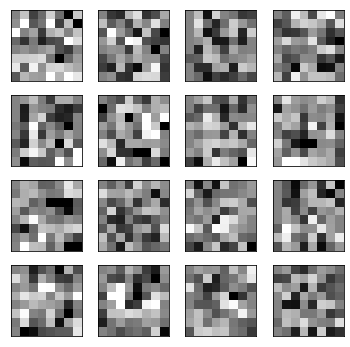

In [43]:
plt.rcParams["figure.figsize"] = (6,6)
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Modell speichern

In [44]:
import pickle

filename = "ZiffernModellDeployment.pkl"

with open(filename, "wb") as file:
    pickle.dump(mlp, file)

Versuchen wir das gleichemit einer SVM:

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




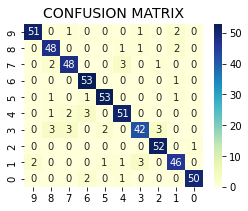

In [45]:
# SVM Initialisieren:
clf = svm.SVC(gamma=0.001)

# Training
clf.fit(X1_train, y1_train)

#Abruf mit Testdaten
predicted_clf = clf.predict(X1_test)

#Auswertung
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y1_test, predicted_clf)}\n"
)

showConfusionMatrix(y1_test, predicted)

Die ersten 4 Testdatensätze:



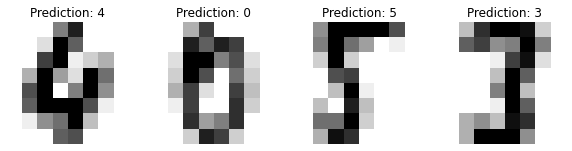

In [46]:
#Die ersten 4 Testdatensätze
print("Die ersten 4 Testdatensätze:\n")
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X1_test, predicted_clf):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

plt.show()